<cite data-cite="9112711/NTEXEY3I"></cite># Title

 ### Contributor1FirstName  Contributor1LastName [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/ORCID_ID) 
Institution

### Contributor2FirstName  Contributor2LastName [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/ORCID_ID_IF_EXIST) 
Institution

### Contributor3FirstName  Contributor3LastName [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/ORCID_ID_IF_EXIST) 
Institution

[![cc-by](https://licensebuttons.net/l/by/4.0/88x31.png)](https://creativecommons.org/licenses/by/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY](https://creativecommons.org/licenses/by/4.0/)


[![cc-by-nc-nd](https://licensebuttons.net/l/by-nc-nd/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-nd/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/4.0/)


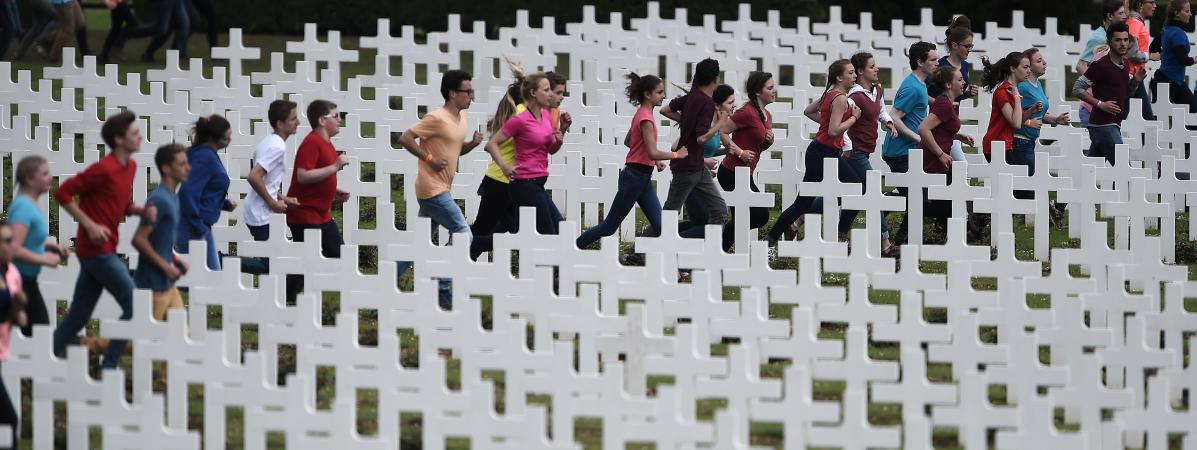

In [4]:
from IPython.display import Image, display

display(Image("./media/CentenaireVerdun.jpg"))

 (optional) This article was orginally published (...)

FirstKeyword, SecondKeyword, AlwaysSeparatedByAComma

This is an abstract (...)

## Introduction

### Aim of this paper

In the field of digital humanities, the great concern is to build an accurate, reliable and useful digital representation of analogical material. For that
reason, methodological papers focus on the main steps of that process : digitalization, layout detection, character recognition, spelling correction, names
recognition, text encoding, design of ontologies. Natural Language Processing and Automatic Classification can be of some use, for instance when it
comes to detecting errors – actually, NLP techniques are built-in parts of
modern OCR algorithms. However, they are mostly seen as tools, and thus
their efficiency is assessed in a pretty straightforward way : how accurate is
the result they provide with regard to the initial material.
When it comes to research in Data Science though, things can get quite
tricky. There is hardly a unified framework to answer questions such as : is
topic modeling giving me good insights about the evolution of the concerns
my corpus deals with over time ? What is a relevant division of my corpus
according to time periods, geographical zones, political lines ? More generally,
it might be quite difficult to be sure that the insights we get from exploratory
analysis are not misleading, especially when we are dealing with amounts of
data that make direct verifications virtually impossible.<br>
In this paper, we aim to address several kinds of problems that historians
have to consider when dealing with large amounts of digital data :
- how can we select relevant data throuh huge amounts of materials ?
- what kind of visualization might give the best insights about the dispersion of the data ?
- how is it possible to come with meaningful variables and to classify the data to a high degree of certainty ?
- what is a relevant method to display evolutions throughout time ?

This article is divided into four sections, each one about one category of
methods. In the first section, we deal with supervised classification, and how
to use it identify relevant information in a huge corpus. In the second section,
we start tackling the high dimension through the angle of visualization : how
to represent information in a way which is meaningful and as little misleading
as it is possible – both for exploration and explanation purposes. In the
third section, we investigate some methods which are specific to NLP and
help building accurate variables beyond the simple frequencies. Finally, the
fourth section is devoted to the analysis of the time component in different
kind of corpora.

This is a hermeneutic paragraph

<div class="cite2c-biblio"></div>

### Previous works and perspectives

### Outline

### Data

lthough this paper is mostly a methodology paper, we will focus on one
single source, namely the parliamentary reports form french Third Republic,
with the hope of showing some insights about the corpus that researches in
political history might find interesting per se. From 1881 to 1940 and the
fall of the Republic, the debates in the lower chamber of french Parliament
have been recorded and published in the Journal Officiel. In the early 2010s,
the archivists from the french national library (BNF) have digitalized these
texts, stored them in a freely accessible database on Gallica[REF], together
with some precious metadata, and finally performed automatic transcription
(OCR) on them. They have made available online these texts in XML format[REF] ; hereafter we will refer to this corpus as OCR-12. However, these
transcriptions were not manually proofread, and, due to the early technology
that was used back then, were not absolutely accurate (see figure 1). Thanks
to grants from BNF-Datalab and INRIA, a team of researchers (INRIA-Almanach, LARHA and Epitech MNSHS) have been able to come up with
a new version of the transcription with greater accuracy, though only for
the period 1890-1900. Most of the examples in this article are taken from
that recent transcription, which we call OCR-21, while for some long-term
analysis we will have to use OCR-12.


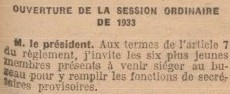

In [23]:
from IPython.display import Image, display
metadata_1={
    "jdh":{
        "module": "object",
        "object": {
          "type": "image",
          "source": [
            "figure 1: Original (digitalized) text",
          ]
        }
    }
}
display(Image(r"latex+images+python\img\jo33.jpg",width = 600, height = 300), metadata=metadata_1)

| OCR-12 version | OCR-21 version
|---|---|
|OUVERTURE DE LA SESSION ORDINAIRE DE 1933 M. le président. Aux termes de l’article 7 5U règlement, j’invite les six plus jeunes Sfâinbres présents à venir siéger au buu pour y remplir les fonctions do secrér "V.l !lles provisoires.|OUVERTURE DE LA SESSION ORDINAIRE DE 1933 M. le président. Aux termes de l’article 7 du règlement, j’invite les six plus jeunes membres présents à venir siéger au bureau pour y remplir les fonctions de secrétaires provisoires.|



##  Building the Data

In this section we will address the question of identifying texts that a relevant for a given purpose

### Supervised classification

Let us assume we dispose of a huge corpus, and we want to find out all
the documents that deal with a certain issue, for instance the role of the
Church within the State. We cannot extensively go through all documents
and decide one after the other. In addition, we cannot just identify a few
keywords, for deciding in advance which ones are necessary would probably
lead to a lot of mistakes and misses. One solution is to train an algorithm
on a sample and then apply it to the rest of the corpus.  
Formally, we consider a problem of supervised classification. We have
two classes, say 0,1 : 1 stands for the documents that are relevant to our
purpose while 0 stands for those who are not. We divide at random the data
set into three parts, (let us say for the sake of example, that they stand for
respectively 6%, 4% and 90% of the corpus) that we call the training set, the
validation test and the test set. The analysis now consists of the following
steps :
1.  Manually label all the texts in the training and validation sets, so
that we know for sure which ones are relevant to the topic and which
ones are not.
2.  Train various algorithms and parameters on the train set and monitor their performance on the validation test.
3.  Once the performance indicators are accurate enough, use the trained
algorithm to find out which texts in the test set belong to the expected
class.

### Assessing the quality of a classification

The ability of an algorithm to correctly predict which text belongs to a
given class among the large test set – which we cannot directly assess, for
it is too big – can be inferred from its ability to predict on the validation
set. Note that this induction only works if the sets are parted randomly :
otherwise, the indicators might be biased. This being said, let us consider
the indicators we dispose of for that assessment.  
First and most straightforward indicator is called accuracy : how many
times does the algorithm succeed at predicting the accurate value of the class.
A score of 50% means the algorithm is not better than pure randomness and
thus can be discarded, while a 100% is a perfect prediction. However an
accuracy at 90% means nothing per se. Indeed, consider the class of all the
texts dealing with Church problems among the parliamentary reports.
These texts represent only 182 among 7473, that means 2.44%. Thus it is possible to
achieve 97.56% accuracy by predicting that no text at all is about the Church.
Thus we will rather rely on two slightly more sophisticated measures : the
Confusion Matrix and the Receiver Operating Characteristic (see Figure 3).
The confusion matrix simply plots the predicted classes against the real ones,
allowing one to simultaneously check the ability of the algorithm to assess all
classes. On the other hand, the ROC curve plots the true positive rate against
the false positive rate as the algorithm builds predictions by decreasing order
of certainty. It can be used both for ranking algorithms (the further a curve
is from the diagonal line the better) and for deciding until which portion
of the sample the algorithm can be trusted (at some point the ratio of true
positive vs false positive becomes too close to a randomness)

| X | Y
|---|---|
|A ceux qui ne veulent pas abroger le Concordat et la loi de l'an X,je dis : Sur ce point, vous devez être avec nous ; il doit y avoir unanimité dans cette Chambre parmi les républicains pour séculariser<br> les biens des congrégations religieuses. (...)|1|
|En effet, un traité a été conclu avec la république Sud-Africaine,celui qu'invoquait au début de la séance M. le ministre des affairesétrangères comme nous liant, par suite de la clause de la nation laplus favorisée, avec les autres pays<br>européens. (...)|0|

| word | score |
|---|---
|mot1|17.5|
|mot2|12.3|
|mot3|-8.6|
|mot4|7.6|
|mot5|-3.9|
|mot6|3.3|

## The dimension problem, part 1 : Visualization

In many social sciences, we are used to dealing with tabular data. Any
data unit can be seen as a vector in some multi-dimensional space. For instance, our corpus can be described as a table of pages, with some meta-data
information, and for every word of the vocabulary the number of occurences
within the page (Table 1). When it comes to this kind of representation, the
dimension of the space can be huge, tens of thousands of columns. Hence it
is difficult to provide a 2-D visualisation of that data, for instance for the
purpose of understanding which pages have similar content, deal with the
same topics, or might have been written in close context.

### Limits of PCA

Among the most popular tools is the Principal Component Analysis
(PCA). Basically the PCA performs a rotation inside the data space, in
such a ways that i-th axis has maximal variance among the subspace where
axis 1 to i − 1 have been removed. This might come in handy when the first
axes are able to capture a significant part of the overall variance, as it is often
the case with small-dimension or highly-correlated data. However, when it
comes to textometry, such conditions are not met so frequently, and thus the
tool can be misleading.
Figure 5 is an example of such a confusion. Here we are displaying the
results of a PCA trained on the documents issued in 1882 – their names
are encoded in the format MONTH-DAY (+_num in case of several documents in a single day), based on the frequency of words in each text.
We can ignore the colors for the moment and focus on the proximity of
some nodes. Formally, the distance between two documents is equal to the
sum of the squares of differences in frequencies over all the vocabulary
D(a, b) = P
w∈V(fw(a) − fw(b))2
. Although they look very close in the PCA
the documents 02-23 and 02-13 are actually quite distant as we can see from
the table. Symmetrically, the documents 02-23 and 05-11 are shown at long
distance from each other in the PCA while they are actually closer neighbors
than the previous pair.
These false impressions could be corrected by looking at the other axes
from the PCA – here the third one mostly, but watching simultaneously
several graphs and pondering them with the contribution of every axis does
not make the PCA a very practical tool for understanding proximities on a
global scale. Therefore, we want to emphasize the importance of two methods
that may be good replacements or complements to PCA, namely : non-linear
transforms and automatic clustering.

|page|date|"président"|"terme"|"article"|"règlement"|...|
|---|---|---|---|---|---|---|
6829|1933-01-10|24|1|5|3|...|

In [63]:
import os
from typing import Tuple, List, Dict, Any, TextIO
import pandas as pd
import numpy as np
from nltk import FreqDist, NaiveBayesClassifier
from matplotlib import pyplot as plt
import re
import plotly.io as pio
import plotly.graph_objects as go
from nltk.corpus import stopwords
from nltk import word_tokenize
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer as FLF
# from spellchecker import SpellChecker  # librairie de post correction (pas encoré utlisé dans le code car ça prend
# du temps) spell = SpellChecker(language="fr",distance=1)
import gensim  # autre modèle de LDA, peut être utile pour comparer
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pickle  # librairie pour save des modèle de machine learning

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.preprocessing import MinMaxScaler

from datetime import datetime, date
from matplotlib import dates as mdates

In [28]:
path_to_data = r"C:\Users\Aurelien Pellet\Desktop\Aurelien\epitech\methodo_histoire_nlp"
path_to_images = r"C:\Users\Aurelien Pellet\Desktop\Aurelien\epitech\jdh_articlemethodo\media"
"os.getcwd()

'C:\\Users\\Aurelien Pellet\\Desktop\\Aurelien\\epitech\\jdh_articlemethodo'

In [37]:
matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_1882_corr.csv"), sep=";",
                                             encoding="utf-8", header=0).set_index("Unnamed: 0")
matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
matx_occurrences = matx_occurrences.transpose()
proximity = MinMaxScaler().fit_transform(matx_occurrences)

caption_content = "table 4:frequency matrix"
display(matx_occurrences.iloc[:5,:5].style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

Unnamed: 0,loi,chambre,commission,ministre,président
1882-01-10,2.000000,13.000000,1.000000,0.000000,33.000000
1882-01-10_1,2.000000,12.000000,1.000000,1.000000,37.000000
1882-01-12,5.000000,18.000000,4.000000,3.000000,26.000000
1882-01-12_1,5.000000,17.000000,4.000000,3.000000,28.000000
1882-01-14,120.000000,92.000000,24.000000,18.000000,61.000000


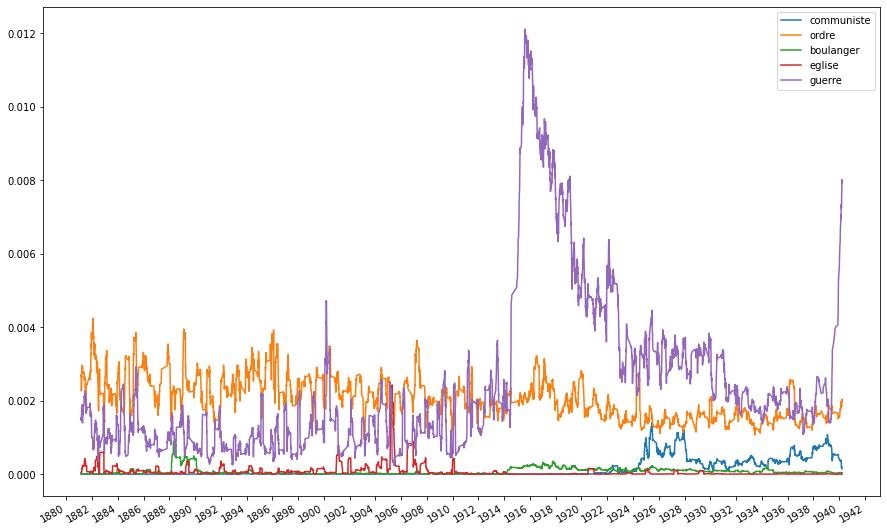

In [113]:
def moving_average(data: List[float], periode: int):
    return np.convolve(np.array(data), np.ones(periode), 'valid') / periode

def ngram(forms: List[str]):
    plt.figure(figsize=(15, 10))
    comptage: Dict[str, List[int]] = {word: list() for word in forms}
    dates: List[date] = list()
    for session_file_adr in os.listdir(os.path.join(path_to_data, "comptage_lemmes")):
        dates.append(datetime.strptime(re.split("\.|_",session_file_adr)[0], '%Y-%m-%d').date())
        session_compteur = pd.read_csv(os.path.join(path_to_data, "comptage_lemmes", session_file_adr),
                                       sep=";", encoding="utf-8").set_index("Unnamed: 0")
        taille: int = session_compteur.sum()
        for word in forms:
            comptage[word].append(session_compteur.loc[word].values[0] / taille.values[0] if word in session_compteur.index else 0)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
    for word in forms:
        plt.plot(dates[18:-18], moving_average(comptage[word], 37), label=word)
    plt.legend()
    plt.gcf().autofmt_xdate()
    #plt.savefig(os.path.join(path_data, "graphes", "frequences.png"))
    plt.show()
    #plt.close()
    
ngram(["communiste", "ordre", "boulanger", "eglise", "guerre"])

calcul ACP
(255, 255)


C:\Users\Aurelien Pellet\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


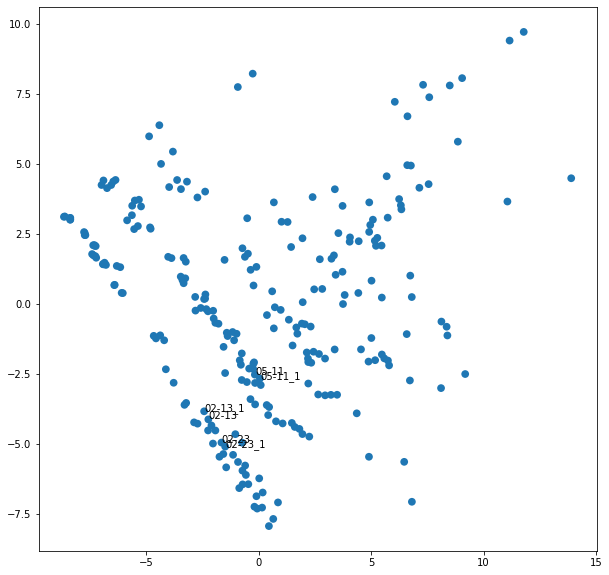

In [39]:
print("calcul ACP")
pca = PCA()
XP = pca.fit_transform(proximity)
print(XP.shape)
#print("variance expliquée", pca.explained_variance_ratio_)
features: List[str] = [date[5:] for date in matx_occurrences.index]
#print("features", features)
for axe in range(1):
    plt.figure(figsize=(10, 10))
    plt.scatter(XP[:, 2 * axe], XP[:, 2 * axe + 1], edgecolors="none", marker="o", cmap="tab10",
                s=60)
    for j, feature in enumerate(features):
        if feature in ["02-23", "05-11", "02-13", "02-23_1", "05-11_1", "02-13_1"]:
            plt.annotate(xy=(XP[j, 2 * axe] + 0.01, XP[j, 2 * axe + 1]), s=feature)